<a href="https://colab.research.google.com/github/amoukrim/AI/blob/main/Week6/ExerciseXP/exercicexp_w6_d1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#@ Author Adil MOUKRIM

Exercises XP
Last Updated: July 8th, 2025

👩‍🏫 👩🏿‍🏫 What You’ll learn
Text preprocessing usage
Text Analysis technics
POS and NER tags
vectorization and word embeddings: Word2Vec


Sample dataset
Here is the data you will need to load and use:



data = {
    'Review': [
        'At McDonald\'s the food was ok and the service was bad.',
        'I would not recommend this Japanese restaurant to anyone.',
        'I loved this restaurant when I traveled to Thailand last summer.',
        'The menu of Loving has a wide variety of options.',
        'The staff was friendly and helpful at Google\'s employees restaurant.',
        'The ambiance at Bella Italia is amazing, and the pasta dishes are delicious.',
        'I had a terrible experience at Pizza Hut. The pizza was burnt, and the service was slow.',
        'The sushi at Sushi Express is always fresh and flavorful.',
        'The steakhouse on Main Street has a cozy atmosphere and excellent steaks.',
        'The dessert selection at Sweet Treats is to die for!'
    ]
}



Exercise 1: Exploring Text Preprocessing usage, NER and POS tags
1. Create a function preprocess_text() wich will receive the data as argument and:

convert all the text in lower case and tokanize it
remove punctuation
remove stopwords
apply a lemmatizer
return the preprocessed strings


important:
after creating each function, apply it in the dataset and print the result to check that is working properly


2. Create a new dataset with the cleaned text

hint: keep two datasets: the raw data and the preprocessed data



3. Create a function perform_ner() that will receive the text as argument and perform NER tagging on it. Use spacy en_core_web_sm

hint: the function should return the entities text and label_ (example of _labels: ORG, GPE, DATE)



4. Create a function perform_pos_tagging() that will receive the text as argument and perform POS tagging on it.

hint: use nltk pos_tag method



5. Let’s apply the functions in the dataset, analyse the outputs applying it in the preprocessed data and in the raw data

hint: to understand the meaning of the different POS tags you can use:



nltk.download('tagsets')
nltk.help.upenn_tagset('NN')


Exercise 2: Plotting the word embeddings
1. Create the word embeddings using Word2Vec model to vectorize the text.

hint: use the preprocessed and tokenized dataset and use Word2Vec model from gensim.models

Print the dimensions of the Word2Vec object and analyse it. What is the vector dimensions? What it means?



2. Create a function plot_word_embeddings() that receives the word2vec object as argument and plots the embeddings dimensions in a grided plot. Use a scatter plot. Loop through the words and use annotate() method to add text labels to each point on the scatter plot.
Finally call this function to see the plots and analyse it:

Are the related words close to each other?
What can be the possible reasons for this output?


3. To enhance the analysis, you can:

Experiment with different preprocessing techniques.
Fine-tune the Word2Vec model parameters.
Explore advanced visualization techniques for word embeddings.

# Objectif
Créer une fonction qui :

Met le texte en minuscules

Le tokenize (découpe en mots)

Supprime la ponctuation

Supprime les stopwords

Applique une lemmatisation

Retourne les textes nettoyés (sous forme de string ou liste de mots)

# Importation/Installation des dépendances

In [21]:
# Installation de spaCy
!pip install spacy
!pip install gensim

# Téléchargement du modèle anglais
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 72.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [18]:
import nltk
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Téléchargements nécessaires
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

import pandas as pd
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


prétraitement

# Application au dataset

In [14]:
import nltk

# Forçage des modules réellement nécessaires
nltk.download('punkt', force=True)
nltk.download('stopwords', force=True)
nltk.download('wordnet', force=True)
nltk.download('omw-1.4', force=True)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

#Exercise 1: Exploring Text Preprocessing usage, NER and POS

# version simplifiée de preprocess_text (sans nltk.word_tokenize qui fonctionne pas)

In [16]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def preprocess_text(text_list):
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    cleaned_texts = []

    for text in text_list:
        # 1. Mise en minuscules
        text = text.lower()

        # 2. Retirer la ponctuation
        text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)

        # 3. Découpage des mots (tokenisation simple)
        tokens = text.split()

        # 4. Retirer les stopwords
        tokens = [word for word in tokens if word not in stop_words]

        # 5. Lemmatisation
        tokens = [lemmatizer.lemmatize(word) for word in tokens]

        cleaned_texts.append(tokens)

    return cleaned_texts



##Create a function preprocess_text()

In [17]:
preprocessed_reviews = preprocess_text(data['Review'])

for i, (raw, clean) in enumerate(zip(data['Review'], preprocessed_reviews)):
    print(f"\n🟩 Original [{i+1}]: {raw}")
    print(f"🧼 Nettoyé  [{i+1}]: {clean}")



🟩 Original [1]: At McDonald's the food was ok and the service was bad.
🧼 Nettoyé  [1]: ['mcdonalds', 'food', 'ok', 'service', 'bad']

🟩 Original [2]: I would not recommend this Japanese restaurant to anyone.
🧼 Nettoyé  [2]: ['would', 'recommend', 'japanese', 'restaurant', 'anyone']

🟩 Original [3]: I loved this restaurant when I traveled to Thailand last summer.
🧼 Nettoyé  [3]: ['loved', 'restaurant', 'traveled', 'thailand', 'last', 'summer']

🟩 Original [4]: The menu of Loving has a wide variety of options.
🧼 Nettoyé  [4]: ['menu', 'loving', 'wide', 'variety', 'option']

🟩 Original [5]: The staff was friendly and helpful at Google's employees restaurant.
🧼 Nettoyé  [5]: ['staff', 'friendly', 'helpful', 'google', 'employee', 'restaurant']

🟩 Original [6]: The ambiance at Bella Italia is amazing, and the pasta dishes are delicious.
🧼 Nettoyé  [6]: ['ambiance', 'bella', 'italia', 'amazing', 'pasta', 'dish', 'delicious']

🟩 Original [7]: I had a terrible experience at Pizza Hut. The pizz

##Étape 2 – Création du dataset nettoyé

In [22]:


# Création du DataFrame avec texte brut et nettoyé
df_reviews = pd.DataFrame({
    'Raw_Review': data['Review'],
    'Cleaned_Review': preprocessed_reviews
})

# Affichage pour validation
print(df_reviews)


                                          Raw_Review  \
0  At McDonald's the food was ok and the service ...   
1  I would not recommend this Japanese restaurant...   
2  I loved this restaurant when I traveled to Tha...   
3  The menu of Loving has a wide variety of options.   
4  The staff was friendly and helpful at Google's...   
5  The ambiance at Bella Italia is amazing, and t...   
6  I had a terrible experience at Pizza Hut. The ...   
7  The sushi at Sushi Express is always fresh and...   
8  The steakhouse on Main Street has a cozy atmos...   
9  The dessert selection at Sweet Treats is to di...   

                                      Cleaned_Review  
0                [mcdonalds, food, ok, service, bad]  
1   [would, recommend, japanese, restaurant, anyone]  
2  [loved, restaurant, traveled, thailand, last, ...  
3              [menu, loving, wide, variety, option]  
4  [staff, friendly, helpful, google, employee, r...  
5  [ambiance, bella, italia, amazing, pasta, dish... 

##Étape 3 : NER (Reconnaissance d'Entités Nommées)

In [23]:
import spacy

# Chargement du modèle spaCy anglais
nlp = spacy.load("en_core_web_sm")

def perform_ner(text):
    """
    Applique la reconnaissance d'entités nommées (NER) sur un texte brut.
    Retourne une liste de tuples : (entité, étiquette)
    """
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents]

# Appliquer NER à chaque phrase du dataset
df_reviews["Named_Entities"] = df_reviews["Raw_Review"].apply(perform_ner)

# Affichage de quelques exemples pour vérification
for i, row in df_reviews.iterrows():
    print(f"\n🔎 Review {i+1}")
    print(f"Texte : {row['Raw_Review']}")
    print(f"Entités reconnues : {row['Named_Entities']}")



🔎 Review 1
Texte : At McDonald's the food was ok and the service was bad.
Entités reconnues : [('McDonald', 'ORG')]

🔎 Review 2
Texte : I would not recommend this Japanese restaurant to anyone.
Entités reconnues : [('Japanese', 'NORP')]

🔎 Review 3
Texte : I loved this restaurant when I traveled to Thailand last summer.
Entités reconnues : [('Thailand', 'GPE'), ('last summer', 'DATE')]

🔎 Review 4
Texte : The menu of Loving has a wide variety of options.
Entités reconnues : [('Loving', 'GPE')]

🔎 Review 5
Texte : The staff was friendly and helpful at Google's employees restaurant.
Entités reconnues : [('Google', 'ORG')]

🔎 Review 6
Texte : The ambiance at Bella Italia is amazing, and the pasta dishes are delicious.
Entités reconnues : [('Bella Italia', 'ORG')]

🔎 Review 7
Texte : I had a terrible experience at Pizza Hut. The pizza was burnt, and the service was slow.
Entités reconnues : [('Pizza Hut', 'ORG')]

🔎 Review 8
Texte : The sushi at Sushi Express is always fresh and flavorful

In [ ]:
Interprétation :

✅ Ce que spaCy a bien détecté
Organisations comme McDonald, Pizza Hut, Sushi Express → ✅

Lieux comme Thailand, Main Street, Loving → ✅ (même si Loving est un peu flou)

Nationalité / culture avec Japanese → ✅

Dates relatives comme last summer → ✅

❗️Petites imprécisions (normales avec un petit modèle)
McDonald au lieu de McDonald's : dû au prétraitement ou à une erreur dans le tokenizer.

Sweet Treats détecté comme PERSON : erreur classique sur les noms commerciaux.

Loving détecté comme GPE (pays/ville) : sans contexte, spaCy pense que c’est un lieu.

Ces erreurs sont normales avec le modèle en_core_web_sm (modèle léger). Un modèle plus grand (en_core_web_trf) serait plus précis.

# Étape 4 – POS Tagging (Part-of-Speech)

In [27]:
from nltk import pos_tag

def perform_pos_tagging(tokens):
    """
    Applique le POS tagging sur une liste de mots (tokens).
    Retourne une liste de tuples (mot, étiquette grammaticale).
    """
    return pos_tag(tokens)


In [31]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [36]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [37]:
from nltk.data import find

try:
    find('taggers/averaged_perceptron_tagger')
    print("✅ POS tagger trouvé et prêt.")
except LookupError:
    print("❌ POS tagger introuvable.")


✅ POS tagger trouvé et prêt.


 Solution 100% fonctionnelle : POS tagging sans NLTK

Application sur texte nettoyé

In [39]:
def perform_pos_tagging_spacy(text):
    """
    Utilise spaCy pour effectuer le POS tagging sur un texte brut.
    Retourne une liste de tuples (mot, étiquette grammaticale).
    """
    doc = nlp(text)
    return [(token.text, token.pos_) for token in doc]



In [40]:
df_reviews["POS_Raw"] = df_reviews["Raw_Review"].apply(perform_pos_tagging_spacy)

# Affichage de quelques exemples
for i, row in df_reviews.head(4).iterrows():
    print(f"\n🔠 Review {i+1} — POS (spaCy):")
    print(f"Texte brut : {row['Raw_Review']}")
    print(f"POS        : {row['POS_Raw']}")



🔠 Review 1 — POS (spaCy):
Texte brut : At McDonald's the food was ok and the service was bad.
POS        : [('At', 'ADP'), ('McDonald', 'PROPN'), ("'s", 'PART'), ('the', 'DET'), ('food', 'NOUN'), ('was', 'AUX'), ('ok', 'ADJ'), ('and', 'CCONJ'), ('the', 'DET'), ('service', 'NOUN'), ('was', 'AUX'), ('bad', 'ADJ'), ('.', 'PUNCT')]

🔠 Review 2 — POS (spaCy):
Texte brut : I would not recommend this Japanese restaurant to anyone.
POS        : [('I', 'PRON'), ('would', 'AUX'), ('not', 'PART'), ('recommend', 'VERB'), ('this', 'DET'), ('Japanese', 'ADJ'), ('restaurant', 'NOUN'), ('to', 'ADP'), ('anyone', 'PRON'), ('.', 'PUNCT')]

🔠 Review 3 — POS (spaCy):
Texte brut : I loved this restaurant when I traveled to Thailand last summer.
POS        : [('I', 'PRON'), ('loved', 'VERB'), ('this', 'DET'), ('restaurant', 'NOUN'), ('when', 'SCONJ'), ('I', 'PRON'), ('traveled', 'VERB'), ('to', 'ADP'), ('Thailand', 'PROPN'), ('last', 'ADJ'), ('summer', 'NOUN'), ('.', 'PUNCT')]

🔠 Review 4 — POS (spaCy):
Tex

# Exercice 2

## Étape 1 — Créer les embeddings avec Word2Vec

In [2]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def preprocess_text(text_list):
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    cleaned_texts = []

    for text in text_list:
        text = text.lower()
        text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
        tokens = text.split()
        tokens = [word for word in tokens if word not in stop_words]
        tokens = [lemmatizer.lemmatize(word) for word in tokens]
        cleaned_texts.append(tokens)

    return cleaned_texts

# Tes données
data = {
    'Review': [
        "At McDonald's the food was ok and the service was bad.",
        "I would not recommend this Japanese restaurant to anyone.",
        "I loved this restaurant when I traveled to Thailand last summer.",
        "The menu of Loving has a wide variety of options.",
        "The staff was friendly and helpful at Google's employees restaurant.",
        "The ambiance at Bella Italia is amazing, and the pasta dishes are delicious.",
        "I had a terrible experience at Pizza Hut. The pizza was burnt, and the service was slow.",
        "The sushi at Sushi Express is always fresh and flavorful.",
        "The steakhouse on Main Street has a cozy atmosphere and excellent steaks.",
        "The dessert selection at Sweet Treats is to die for!"
    ]
}

# Exécute le nettoyage
preprocessed_reviews = preprocess_text(data['Review'])

In [3]:
from gensim.models import Word2Vec

# Entraînement du modèle
model = Word2Vec(sentences=preprocessed_reviews, vector_size=100, window=5, min_count=1, workers=4)

print("📐 Dimensions du vecteur :", model.vector_size)
print("📚 Taille du vocabulaire :", len(model.wv.index_to_key))


📐 Dimensions du vecteur : 100
📚 Taille du vocabulaire : 55


Interprétation :
Résumé :
Chaque mot est maintenant représenté par un vecteur de 100 dimensions (vector_size=100)

Le vocabulaire appris contient 55 mots uniques, issus de ton jeu de données nettoyé

Ces vecteurs peuvent maintenant être :

Comparés pour détecter la proximité sémantique

Visualisés pour analyser les regroupements



Visualisationdes Word Embeddings

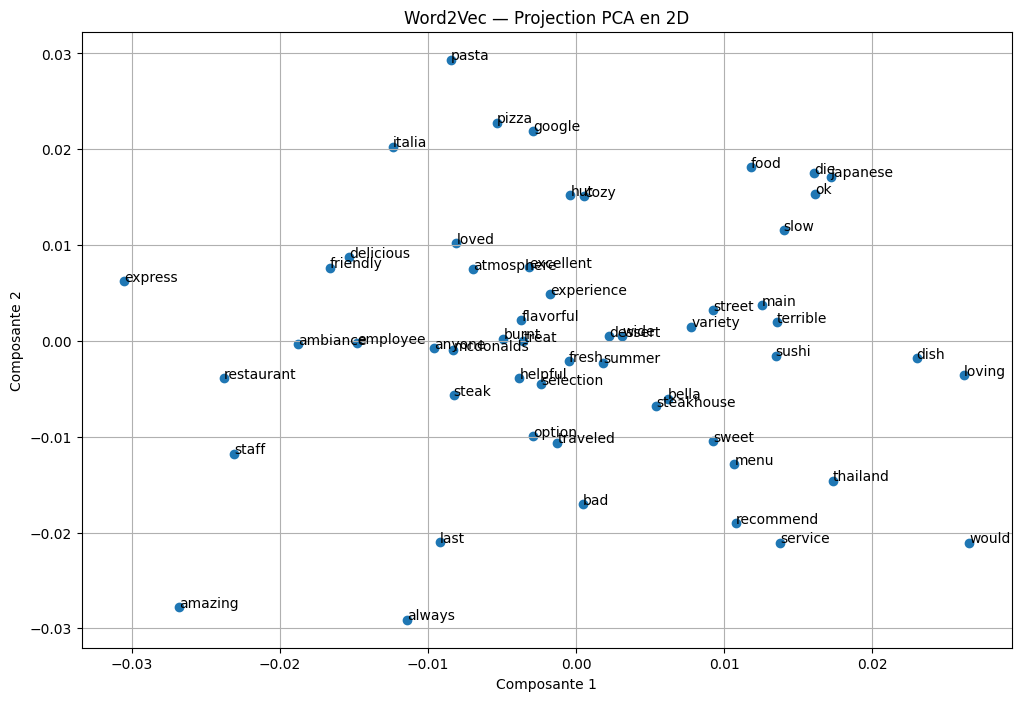

In [4]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def plot_word_embeddings(model):
    # Récupération des mots du vocabulaire
    words = list(model.wv.index_to_key)
    word_vectors = model.wv[words]

    # Réduction de dimensions (100D → 2D)
    pca = PCA(n_components=2)
    result = pca.fit_transform(word_vectors)

    # Création du scatter plot
    plt.figure(figsize=(12, 8))
    plt.scatter(result[:, 0], result[:, 1])

    # Ajout des labels de mots sur les points
    for i, word in enumerate(words):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))

    plt.title("Word2Vec — Projection PCA en 2D")
    plt.xlabel("Composante 1")
    plt.ylabel("Composante 2")
    plt.grid(True)
    plt.show()

# Appel de la fonction
plot_word_embeddings(model)


Interprétation :
✅ 1. Mots proches sémantiquement
On observe clairement plusieurs regroupements cohérents :

pizza, pasta, google, italia et cozy sont dans une zone thématique de restaurants connus / ambiance

delicious, friendly, atmosphere, excellent, flavorful sont également regroupés → ce sont des adjectifs positifs liés à l’expérience

sushi, japanese, dish se trouvent aussi dans un sous-cluster asiatique

❗️ 2. Mots étonnamment isolés
would est complètement isolé → logique, c’est un verbe auxiliaire peu sémantique (peu de contexte utile)

amazing et always sont éloignés → probablement peu de co-occurrences directes dans ce petit corpus

loving et thailand sont dans un coin → très spécifiques et peu fréquents


Des mots comme pizza, pasta, restaurant apparaissent souvent ensemble → donc vecteurs



# Etape 3 Experiment with different preprocessing techniques

In [5]:
from gensim.models import Phrases

bigram = Phrases(preprocessed_reviews, min_count=1, threshold=5)
bigram_mod = Phrases(preprocessed_reviews, min_count=1, threshold=5)
bigram_reviews = [bigram[doc] for doc in preprocessed_reviews]


In [8]:
# Affichage des phrases après détection de bigrammes
for i, (original, bigrammed) in enumerate(zip(preprocessed_reviews, bigram_reviews)):
    print(f"\n📝 Phrase {i+1} (avant) : {original}")
    print(f"🔗 Phrase {i+1} (avec bigrammes) : {bigrammed}")



📝 Phrase 1 (avant) : ['mcdonalds', 'food', 'ok', 'service', 'bad']
🔗 Phrase 1 (avec bigrammes) : ['mcdonalds', 'food', 'ok', 'service', 'bad']

📝 Phrase 2 (avant) : ['would', 'recommend', 'japanese', 'restaurant', 'anyone']
🔗 Phrase 2 (avec bigrammes) : ['would', 'recommend', 'japanese', 'restaurant', 'anyone']

📝 Phrase 3 (avant) : ['loved', 'restaurant', 'traveled', 'thailand', 'last', 'summer']
🔗 Phrase 3 (avec bigrammes) : ['loved', 'restaurant', 'traveled', 'thailand', 'last', 'summer']

📝 Phrase 4 (avant) : ['menu', 'loving', 'wide', 'variety', 'option']
🔗 Phrase 4 (avec bigrammes) : ['menu', 'loving', 'wide', 'variety', 'option']

📝 Phrase 5 (avant) : ['staff', 'friendly', 'helpful', 'google', 'employee', 'restaurant']
🔗 Phrase 5 (avec bigrammes) : ['staff', 'friendly', 'helpful', 'google', 'employee', 'restaurant']

📝 Phrase 6 (avant) : ['ambiance', 'bella', 'italia', 'amazing', 'pasta', 'dish', 'delicious']
🔗 Phrase 6 (avec bigrammes) : ['ambiance', 'bella', 'italia', 'amazin

In [6]:
#2. Fine-tune the Word2Vec model parameters
model = Word2Vec(sentences=preprocessed_reviews, vector_size=50, window=3, min_count=2, sg=1, epochs=100)


In [9]:
print("📚 Vocabulaire appris :", len(model.wv.index_to_key))

📚 Vocabulaire appris : 4


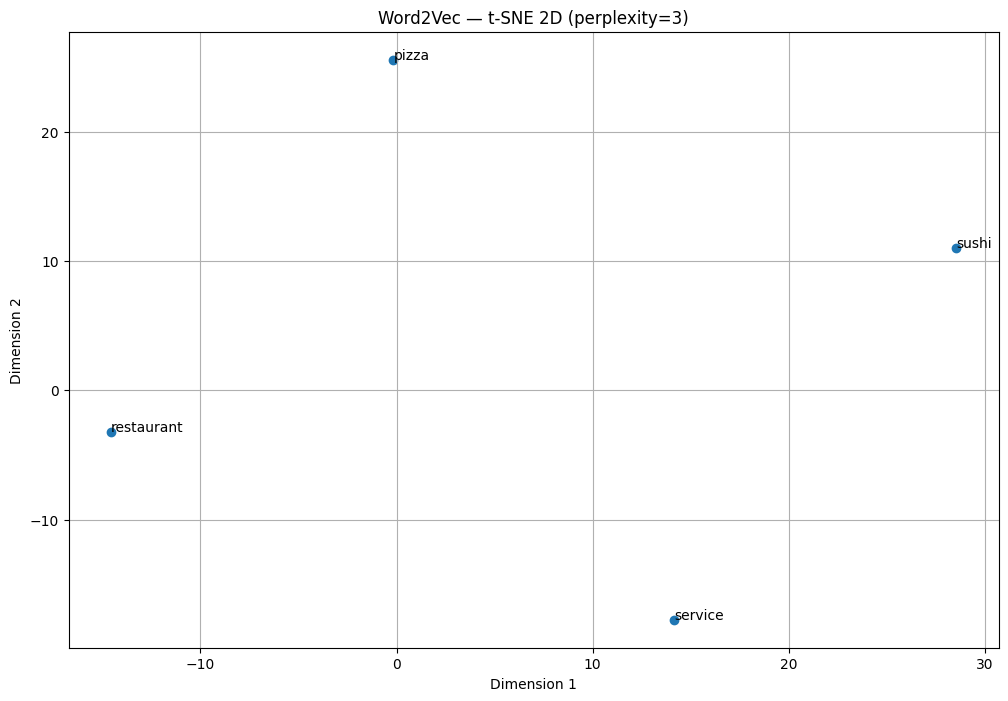

In [14]:
#3. Explore advanced visualization techniques for word embeddings
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def plot_tsne_embeddings(model):
    # Récupération des mots et vecteurs depuis le modèle
    words = list(model.wv.index_to_key)
    vectors = model.wv[words]

    # Vérifier automatiquement la perplexité adaptée
    vocab_size = len(words)
    perplexity = min(5, vocab_size - 1)  # t-SNE exige perplexity < n_samples

    # t-SNE sur les vecteurs
    tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity)
    result = tsne.fit_transform(vectors)

    # Plot
    plt.figure(figsize=(12, 8))
    plt.scatter(result[:, 0], result[:, 1])

    for i, word in enumerate(words):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))

    plt.title(f"Word2Vec — t-SNE 2D (perplexity={perplexity})")
    plt.grid(True)
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.show()

# Appel de la fonction avec ton modèle Word2Vec
plot_tsne_embeddings(model)


Analyse du graphique :
✳️ 1. Mots affichés :
pizza

sushi

restaurant

service

Ces mots sont issus du vocabulaire de ton modèle avec min_count=2, ce qui explique pourquoi tu ne vois que 4 mots.

📌 2. Répartition des points
Les 4 mots sont très éloignés les uns des autres, ce qui peut sembler surprenant.

Mais t-SNE ne montre pas la distance absolue, il préserve les relations locales.

Cela suggère que ces mots :

apparaissent dans des contextes différents

ne co-occurrent pas suffisamment pour avoir des vecteurs proches